# Comcast Telecom Consumer Complaints

DESCRIPTION: Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

In [1]:
#1.) Import data into Python environment:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = r"C:\Users\12489\Documents\Data\comcast_complaints.csv"
df = pd.read_csv(data_path)

df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
#2.) Provide charts for the number of complaints at monthly and daily granularity levels

df['monthly']=pd.to_datetime(df['Date_month_year']).dt.month_name()
df['daily']=pd.to_datetime(df['Date_month_year']).dt.day

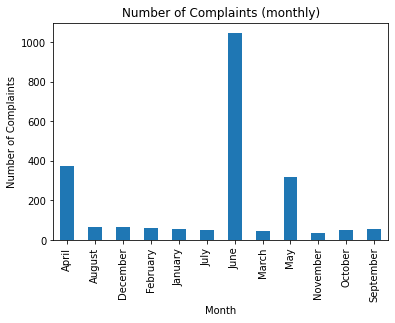

In [4]:
# Monthly:

df.groupby(['monthly'])['Customer Complaint'].count().plot(kind='bar')
plt.ylabel("Number of Complaints")
plt.xlabel("Month")
plt.title("Number of Complaints (monthly)")
plt.show()

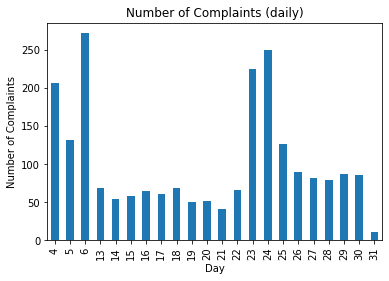

In [5]:
# Daily:
df.groupby(['daily'])['Customer Complaint'].count().plot(kind='bar')
plt.ylabel("Number of Complaints")
plt.xlabel("Day")
plt.title("Number of Complaints (daily)")
plt.show()

In [6]:
#3.) Provide a table with the frequency of complaint types.

df['Customer Complaint'] = df['Customer Complaint'].str.lower()

df['Customer Complaint'].value_counts().to_frame().reset_index()

,index,Customer Complaint
0,comcast,102
1,comcast data cap,30
2,comcast internet,29
3,comcast data caps,21
4,comcast billing,18
...,...,...
1735,monthly data caps,1
1736,"comcast/xfinity poor service, fraudulent billi...",1
1737,lost emails/billing,1
1738,improper billing and non resolution of issues,1


In [7]:
# Which complaint types are maximum? (ex. internet, network issues, etc)

df['Customer Complaint'].value_counts().head(5)

comcast              102
comcast data cap      30
comcast internet      29
comcast data caps     21
comcast billing       18
Name: Customer Complaint, dtype: int64

--------------------

In [8]:
# 4.) Simplify the "Status" column - keep two variables: Open & Closed. 

# Open & Pending = Open 
# Closed & Solved = Closed

updated_status = []

for i in df["Status"]:
    if( (i=='Open') or (i=='Pending')):
        updated_status.append("Open")
    else:
        updated_status.append("Closed")

-----------------

In [9]:
# 5.) Visualize the state-wise *status* of complaints with a stacked bar chart.

open=df[df['Status']=='Open'].groupby(['State'])['Status'].count().to_frame().reset_index()
closed=df[df['Status']=='Closed'].groupby(['State'])['Status'].count().to_frame().reset_index()

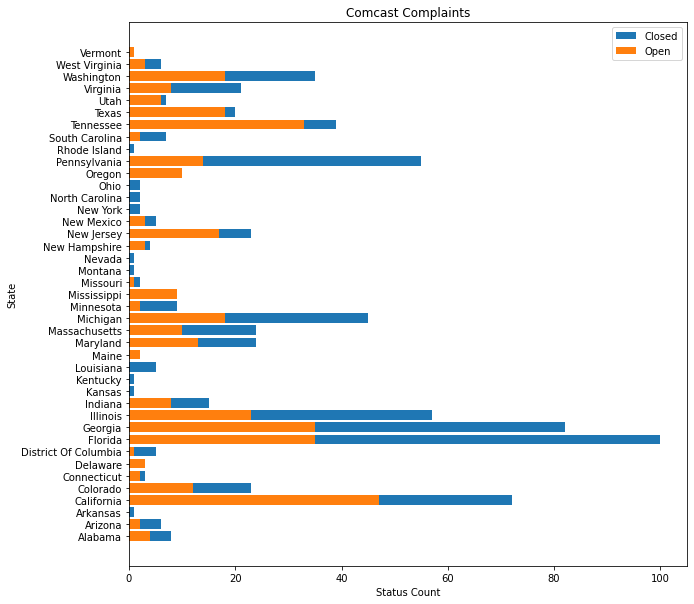

In [10]:
fig=plt.figure(figsize=(10,10))
plt.barh(closed.State, closed.Status)
plt.barh(open.State, open.Status)

plt.ylabel("State",size=10)
plt.xlabel("Status Count")
plt.legend(["Closed", "Open"])
plt.title("Comcast Complaints")

plt.show()


In [11]:
# Which state has the maximum complaints?

df['State'].value_counts().head()


Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
Name: State, dtype: int64

In [12]:
# Which state has the highest percentage of unresolved complaints?

df[df['Status']=="Open"][['State']].value_counts().head()

State     
California    47
Florida       35
Georgia       35
Tennessee     33
Illinois      23
dtype: int64

------------------

In [13]:
#6.) Provide the percentage of complaints resolved, which were received through the Internet and customer care calls.

df[df['Status']=="Closed"][['Received Via']].value_counts(normalize=True)*100

Received Via      
Customer Care Call    52.724796
Internet              47.275204
dtype: float64